# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url + city)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | tsetserleg
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | primorsko-akhtarsk
Processing Record 8 of Set 1 | newry
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | bestobe
Processing Record 14 of Set 1 | boa vista
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | raja
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | choyr
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | ouled mimoun
Processing Record 22 of Set 1 | hawaiian paradise p

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=[
                "City","Lat","Lng","Max Temp","Humidity","Cloudiness",
                "Wind Speed","Country","Date"])

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-10.79,78,71,6.19,RU,1683516576
1,rongelap,11.1635,166.8941,27.45,80,61,8.20,MH,1683516576
2,tsetserleg,47.4750,101.4542,9.20,40,100,1.75,MN,1683516182
3,edinburgh of the seven seas,-37.0676,-12.3116,14.25,64,63,1.95,SH,1683516131
4,ola,59.5833,151.2833,5.08,84,57,3.17,RU,1683516218


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.79,78,71,6.19,RU,1683516576
1,rongelap,11.1635,166.8941,27.45,80,61,8.20,MH,1683516576
2,tsetserleg,47.4750,101.4542,9.20,40,100,1.75,MN,1683516182
3,edinburgh of the seven seas,-37.0676,-12.3116,14.25,64,63,1.95,SH,1683516131
4,ola,59.5833,151.2833,5.08,84,57,3.17,RU,1683516218


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

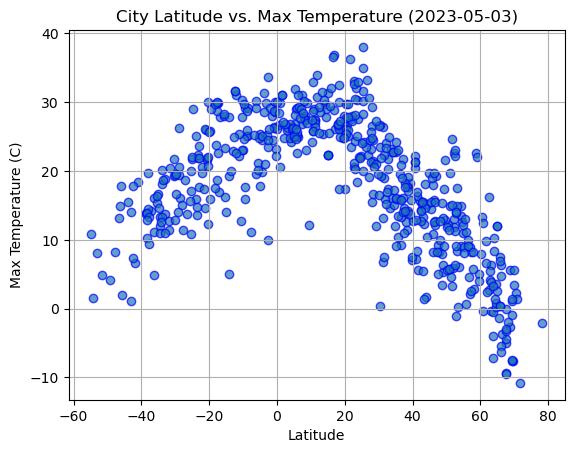

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
date_val = datetime.date(datetime.now())

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature '+ date_val)
plt.grid()
plt.show()

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

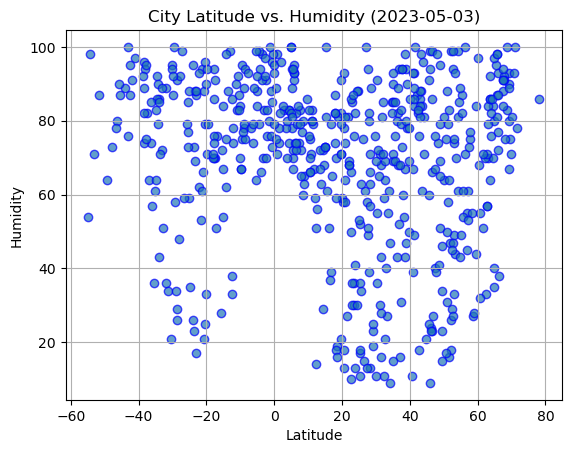

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
date_val = datetime.date(datetime.now())

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity '+ date_val)
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

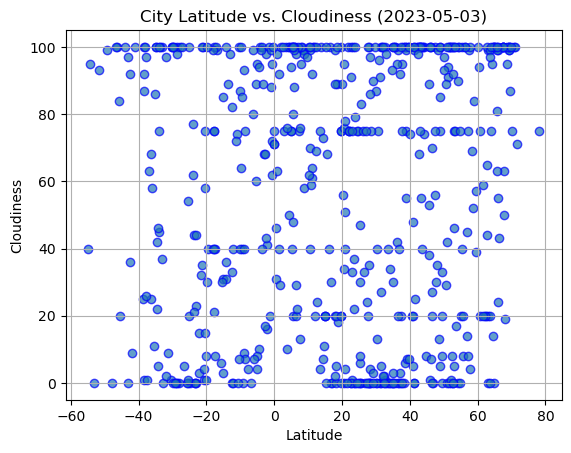

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
date_val = datetime.date(datetime.now())

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness '+ date_val)
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

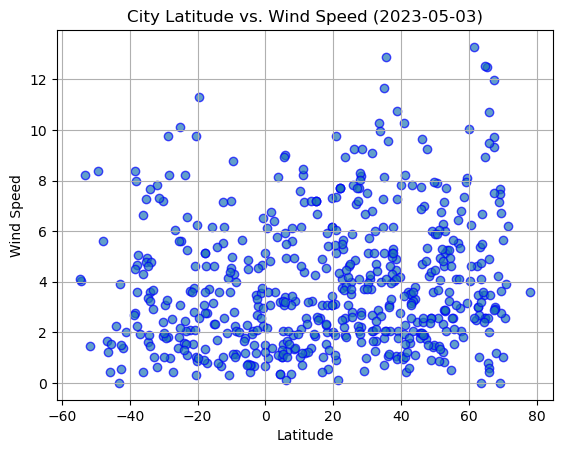

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
date_val = datetime.date(datetime.now())

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed '+ date_val)
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots

def create_linear_reg(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print('The correlation between ' + x.name + ' and ' + y.name + ' is {:0.2f}'.format(y.corr(x)))

    date_val = datetime.date(datetime.now())
    
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f"{x.name} vs. {y.name} {date_val}")
    plt.grid()
    plt.show()


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.79,78,71,6.19,RU,1683516576
1,rongelap,11.1635,166.8941,27.45,80,61,8.20,MH,1683516576
2,tsetserleg,47.4750,101.4542,9.20,40,100,1.75,MN,1683516182
4,ola,59.5833,151.2833,5.08,84,57,3.17,RU,1683516218
5,ilulissat,69.2167,-51.1000,-0.99,93,100,0.00,GL,1683516126


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.25,64,63,1.95,SH,1683516131
9,blackmans bay,-43.0167,147.3167,14.07,76,97,3.91,AU,1683516577
14,port-aux-francais,-49.3500,70.2167,4.14,64,99,8.39,TF,1683516578
15,kone,-21.0595,164.8658,25.97,66,100,2.82,NC,1683516578
17,avarua,-21.2078,-159.7750,26.03,94,100,1.54,CK,1683516579


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Lat and Max Temp is -0.85


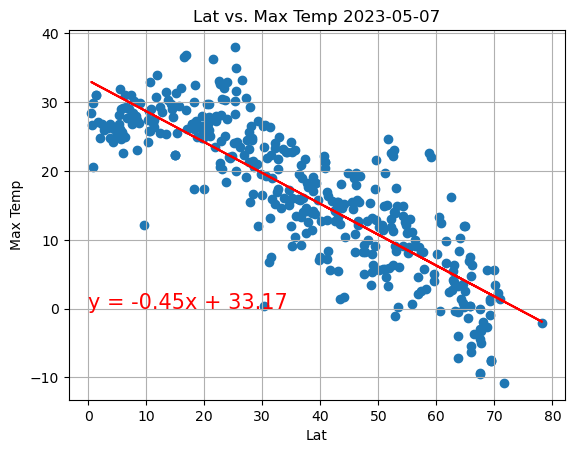

In [40]:
# Linear regression on Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],0,0)

The correlation between Lat and Max Temp is 0.71


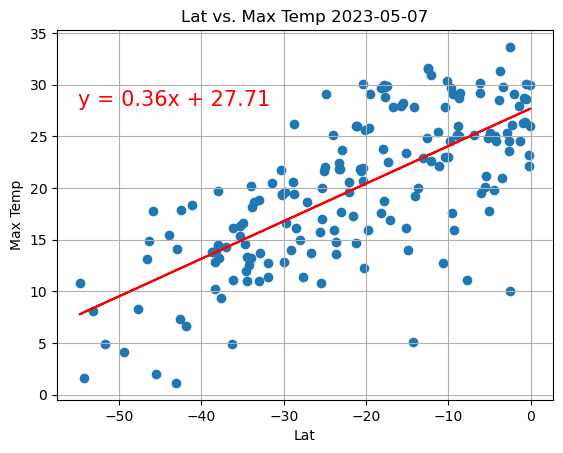

In [41]:
# Linear regression on Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-55,28)

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere's show a strong correlation indicating that we should be able to have the ability to predict values based on both latitude and tempurature.  It was interesting to see that the Northern Hemisphere had a stronger grouping, but not by a lot.

### Humidity vs. Latitude Linear Regression Plot

The correlation between Lat and Humidity is 0.02


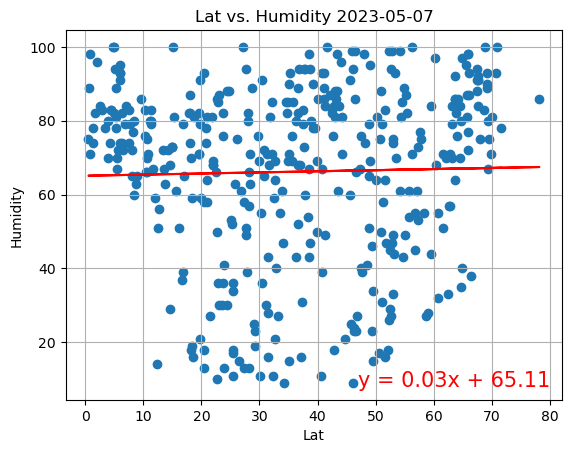

In [42]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],47,8)

The correlation between Lat and Humidity is 0.11


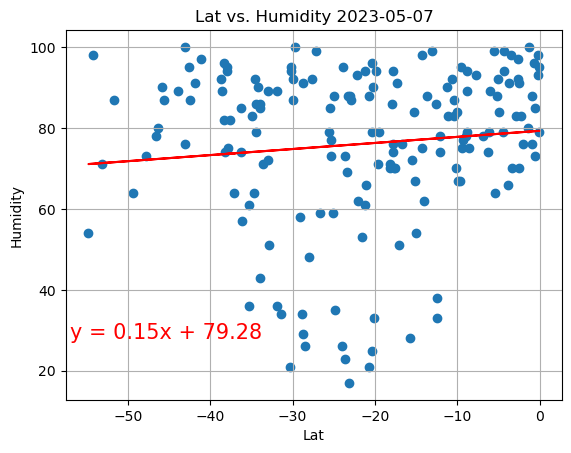

In [43]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],-57,28)

**Discussion about the linear relationship:** Unfortunately when we use Humidity as a plotting factor the correlation value gets mighty close to 0 value which also is shown on the scatter points.  They are wide spread with no real order or direction.   It is not safe to consider humidty as a variable for prediction.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Lat and Cloudiness is 0.06


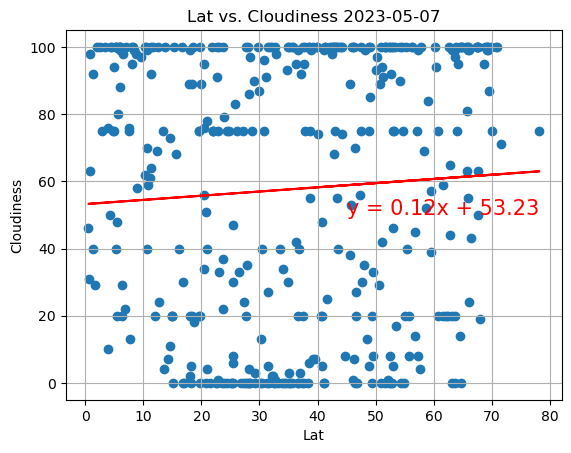

In [44]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],45,50)

The correlation between Lat and Cloudiness is 0.02


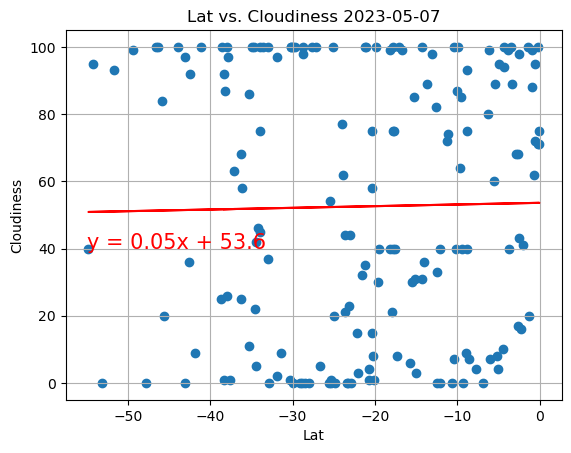

In [45]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],-55,40)

**Discussion about the linear relationship:** Cloudiness takes it even further than Humidity and is almost 0.00 in both cases - the regression curve is nowhere near the data points and cannot be reliably used for prediction.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Lat and Wind Speed is 0.12


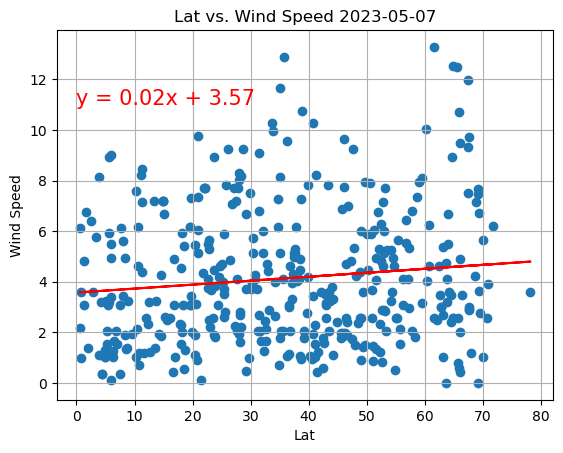

In [46]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],0,11)

The correlation between Lat and Wind Speed is -0.13


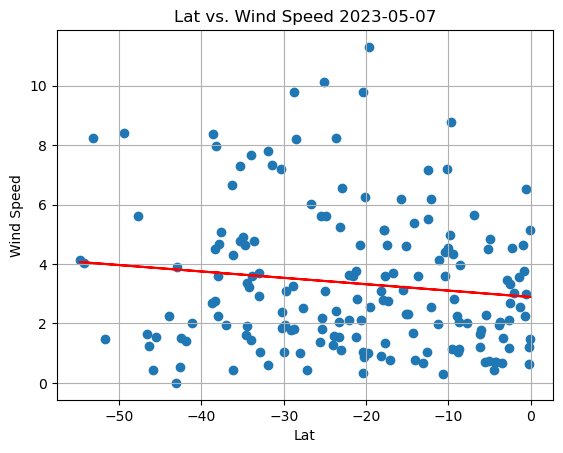

In [47]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-30,14)

**Discussion about the linear relationship:**  There is a mild relationship between th e correlation value and plot points. The values are still fairly wide spread but at least are in a pattern that are perceptable by the eye.    The lower the wind speed the tighter the data is grouped and able to be predicted.